In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [7]:
# 폰트 깨짐 방지
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [12]:
dirpath = './rawfiles/'
files = os.listdir(dirpath)

In [13]:
raw = pd.DataFrame()
for file in files:
    temp = pd.read_csv(dirpath + file)
    raw = pd.concat([raw, temp], axis=0)

In [14]:
raw = raw.reset_index(drop=True)

In [15]:
# 요일 추가하기
raw['사용일자'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')

raw['요일'] = raw['사용일자'].dt.dayofweek

In [16]:
conv = {
    0 : '일',
    1 : '월',
    2 : '화',
    3 : '수',
    4 : '목',
    5 : '금',
    6 : '토'
}
raw['요일'] = raw['요일'].map(conv)

In [17]:
# 연월 넣기
raw['연월'] = raw['사용일자'].dt.strftime('%Y-%m')
# 월일 넣기
raw['월일'] = raw['사용일자'].dt.strftime('%m-%d')

In [22]:
# 승하차 총객수 넣기
raw['승하차총승객수'] = raw['승차총승객수'] + raw['하차총승객수']

In [23]:
raw = raw[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일', '등록일자' ]]
raw.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,월,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,월,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,월,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,월,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104


In [24]:
# 작업한 결과를 data 폴더에 저장하겠습니다.

fpath = './subway_raw.csv'
raw.to_csv(fpath, index=False, encoding='utf-8-sig')

# 가장 많이 이용한 날은 언제일까?

In [32]:
raw.groupby(['사용일자'])['승하차총승객수'].sum().sort_values(ascending=False).head(3)

사용일자
2019-05-03    18425509.0
2019-05-10    18297824.0
2019-05-24    18107448.0
Name: 승하차총승객수, dtype: float64

### 19년도 5월 3일에 가장 많이 이용

# 5월에 가장 많이 지하철을 사용했을까?

In [29]:
raw.groupby(['연월'])['승하차총승객수'].sum().sort_values(ascending=False)

연월
2019-05    485718557.0
2019-04    470934348.0
2019-03    466692826.0
2019-01    442746389.0
2019-06    442210635.0
2019-02    379836010.0
Name: 승하차총승객수, dtype: float64

### 5월에 가장 많이 이용

# 목요일에 가장 많이 이용했을까?

In [33]:
raw.groupby(['요일'])['승하차총승객수'].sum().sort_values(ascending=False)

요일
목    445310717.0
수    428684383.0
화    421134136.0
월    411979965.0
일    391555551.0
금    341950018.0
토    247523995.0
Name: 승하차총승객수, dtype: float64

### 목요일에 가장 많이 이용했다

# 월-일 별 pointplot 그래프

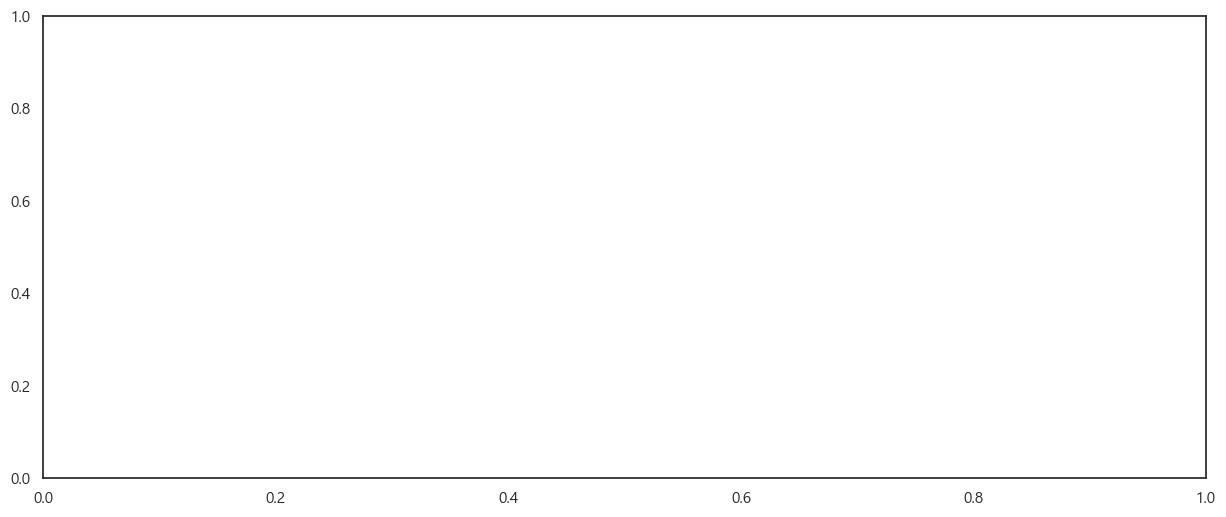

In [39]:
# 월별 자료 쪼개기
raw_jan = raw[raw['연월'] == '2019-01']
raw_feb = raw[raw['연월'] == '2019-02']
raw_mar = raw[raw['연월'] == '2019-03']
raw_apr = raw[raw['연월'] == '2019-04']
raw_may = raw[raw['연월'] == '2019-05']
raw_jun = raw[raw['연월'] == '2019-06']

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

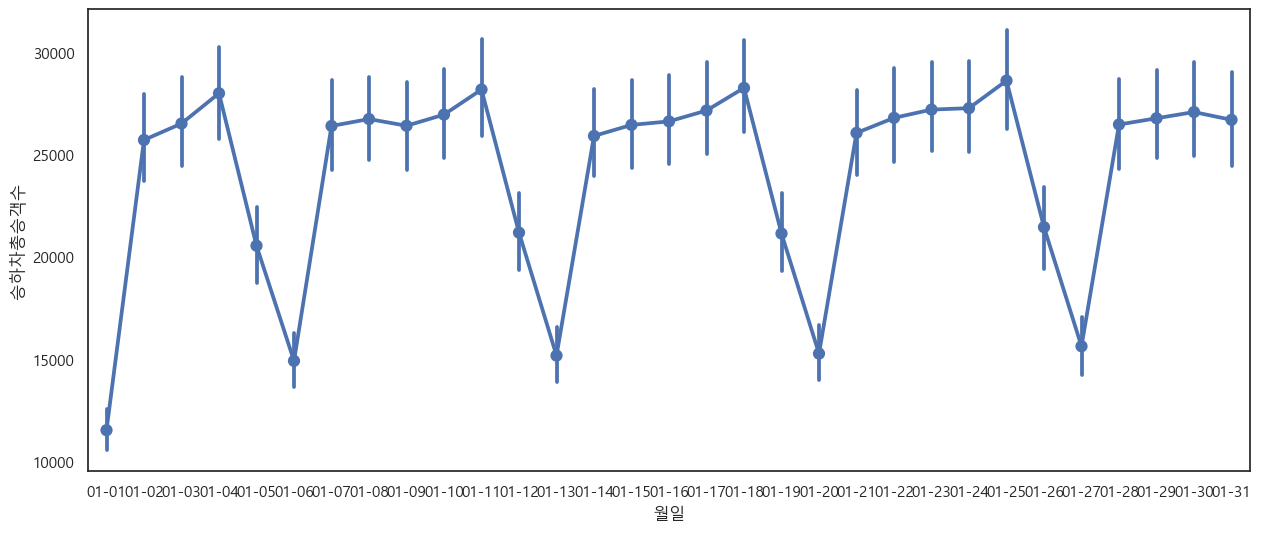

In [40]:
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(x=raw_jan['월일'], y=raw_jan['승하차총승객수'])

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

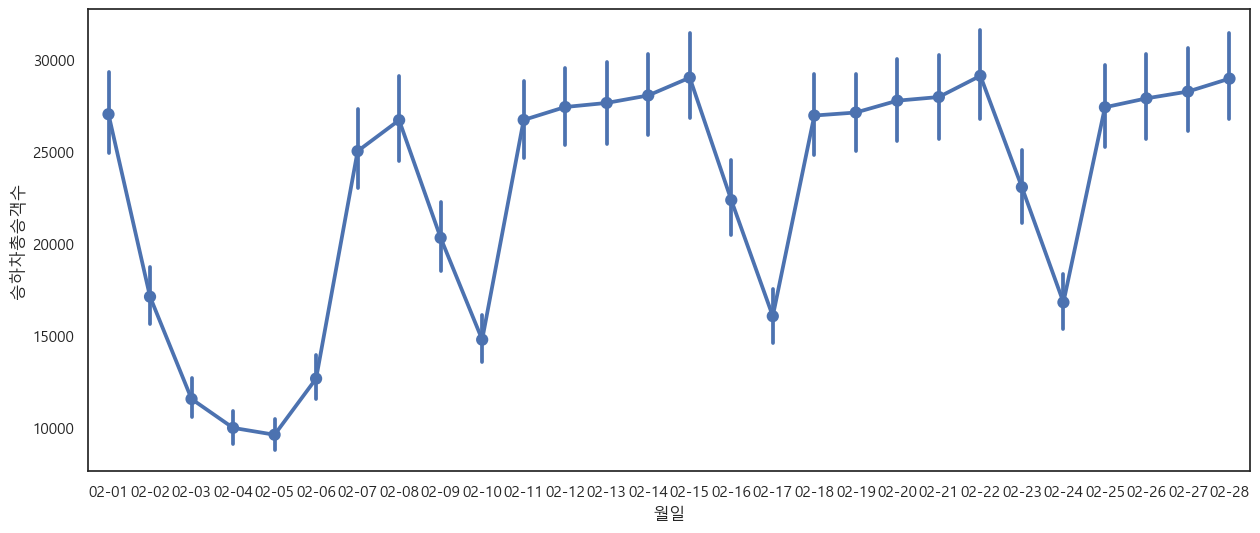

In [41]:
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(x=raw_feb['월일'], y=raw_feb['승하차총승객수'])

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

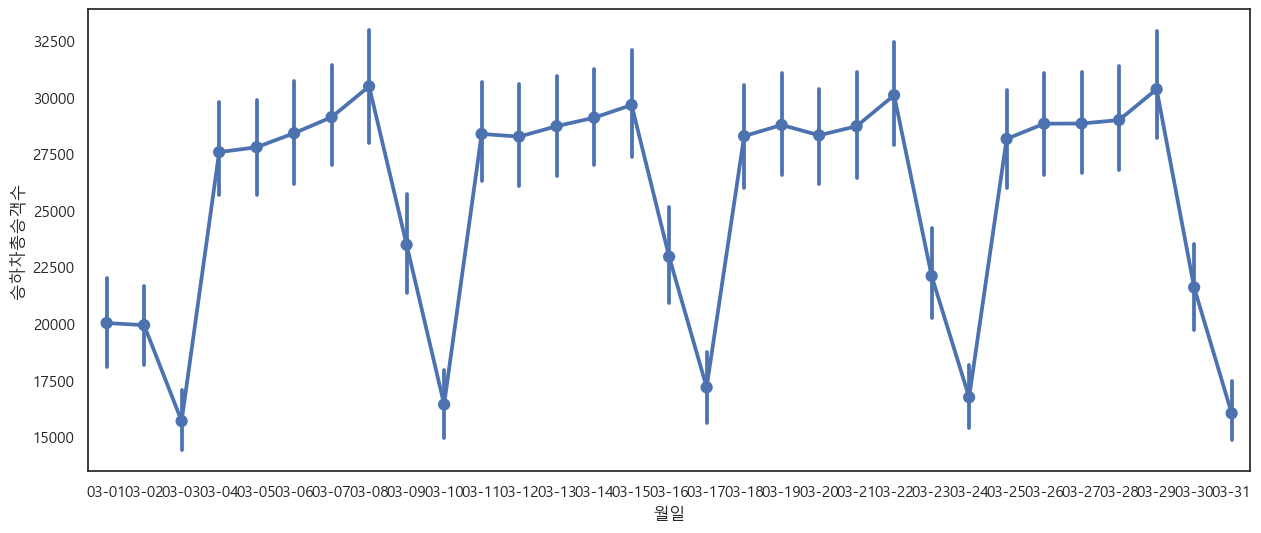

In [42]:
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(x=raw_mar['월일'], y=raw_mar['승하차총승객수'])

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

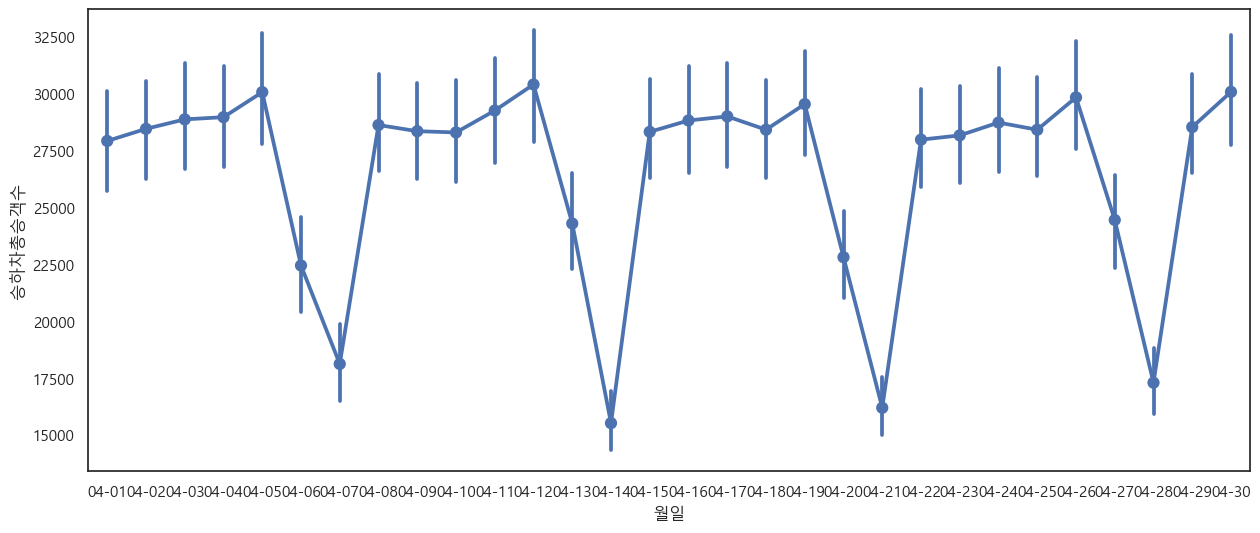

In [43]:
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(x=raw_apr['월일'], y=raw_apr['승하차총승객수'])

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

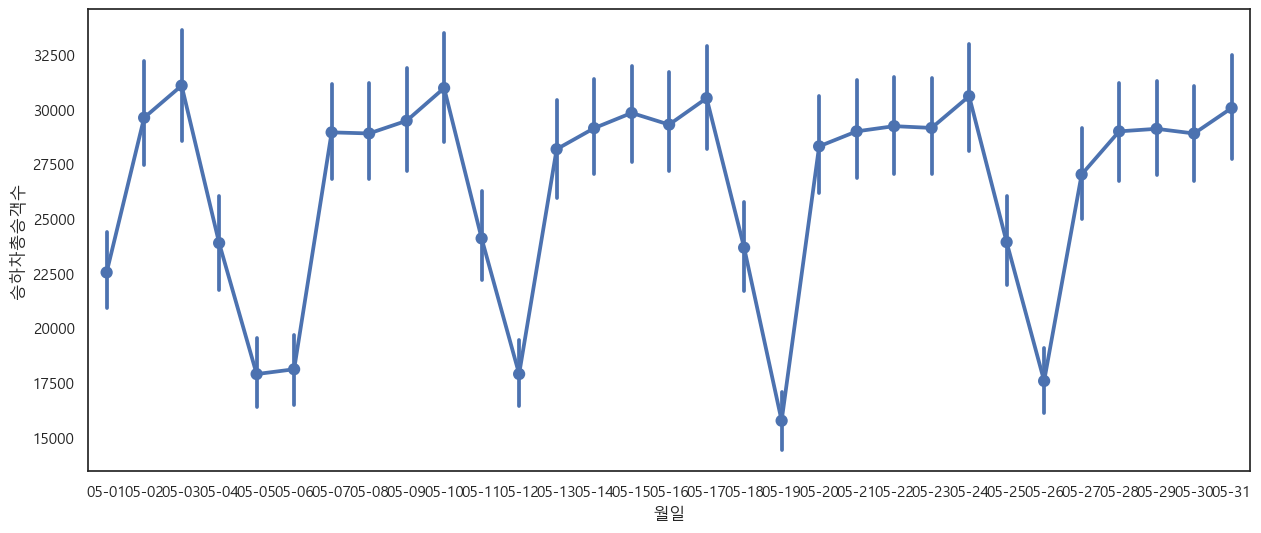

In [44]:
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(x=raw_may['월일'], y=raw_may['승하차총승객수'])

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

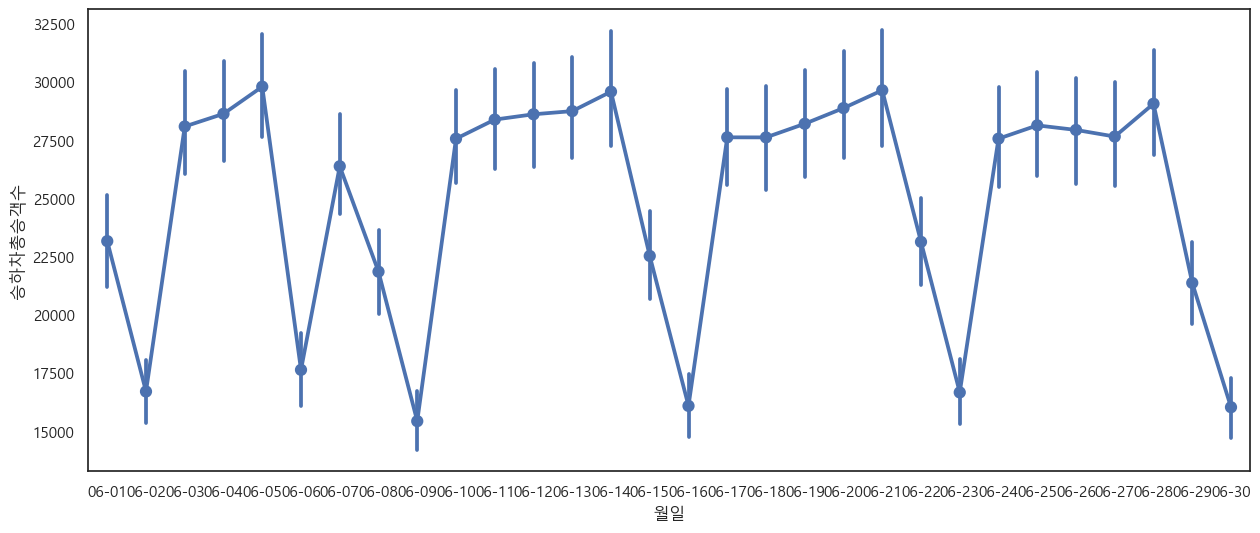

In [45]:
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(x=raw_jun['월일'], y=raw_jun['승하차총승객수'])

# 승차가 가장 많이 일어나는 역은?

In [48]:
raw.groupby(['역명'])['승차총승객수'].sum().sort_values(ascending=False).head(3)

역명
잠실       18574323.0
강남       18148024.0
고속터미널    17541287.0
Name: 승차총승객수, dtype: float64

In [49]:
raw.sort_values(by='승차총승객수',ascending=False).head(3)

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
5943,2019-01-11,목,2호선,강남,132727.0,137826.0,270553.0,2019-01,01-11,20190114
14224,2019-01-25,목,2호선,강남,131976.0,136614.0,268590.0,2019-01,01-25,20190128
10085,2019-01-18,목,2호선,강남,130864.0,136701.0,267565.0,2019-01,01-18,20190121


### 총합해서 가장 많이 승차한 곳은 잠실, 가장 많은 승차가 이뤄진 값은 강남

# 노선별로 역별/요일별 승차승객수 heatmap

In [82]:
# 호선별 나누기 (3호선까지만 해보겠습니다)
raw_01 = raw[raw['노선명'] == '1호선']
raw_02 = raw[raw['노선명'] == '2호선']
raw_03 = raw[raw['노선명'] == '3호선']

In [83]:
# 각각의 피봇테이블 만들기
pivot_01 = pd.pivot_table(raw_01,index='역명', columns='요일', values='승차총승객수')
pivot_02 = pd.pivot_table(raw_02,index='역명', columns='요일', values='승차총승객수')
pivot_03 = pd.pivot_table(raw_03,index='역명', columns='요일', values='승차총승객수')

<AxesSubplot: xlabel='요일', ylabel='역명'>

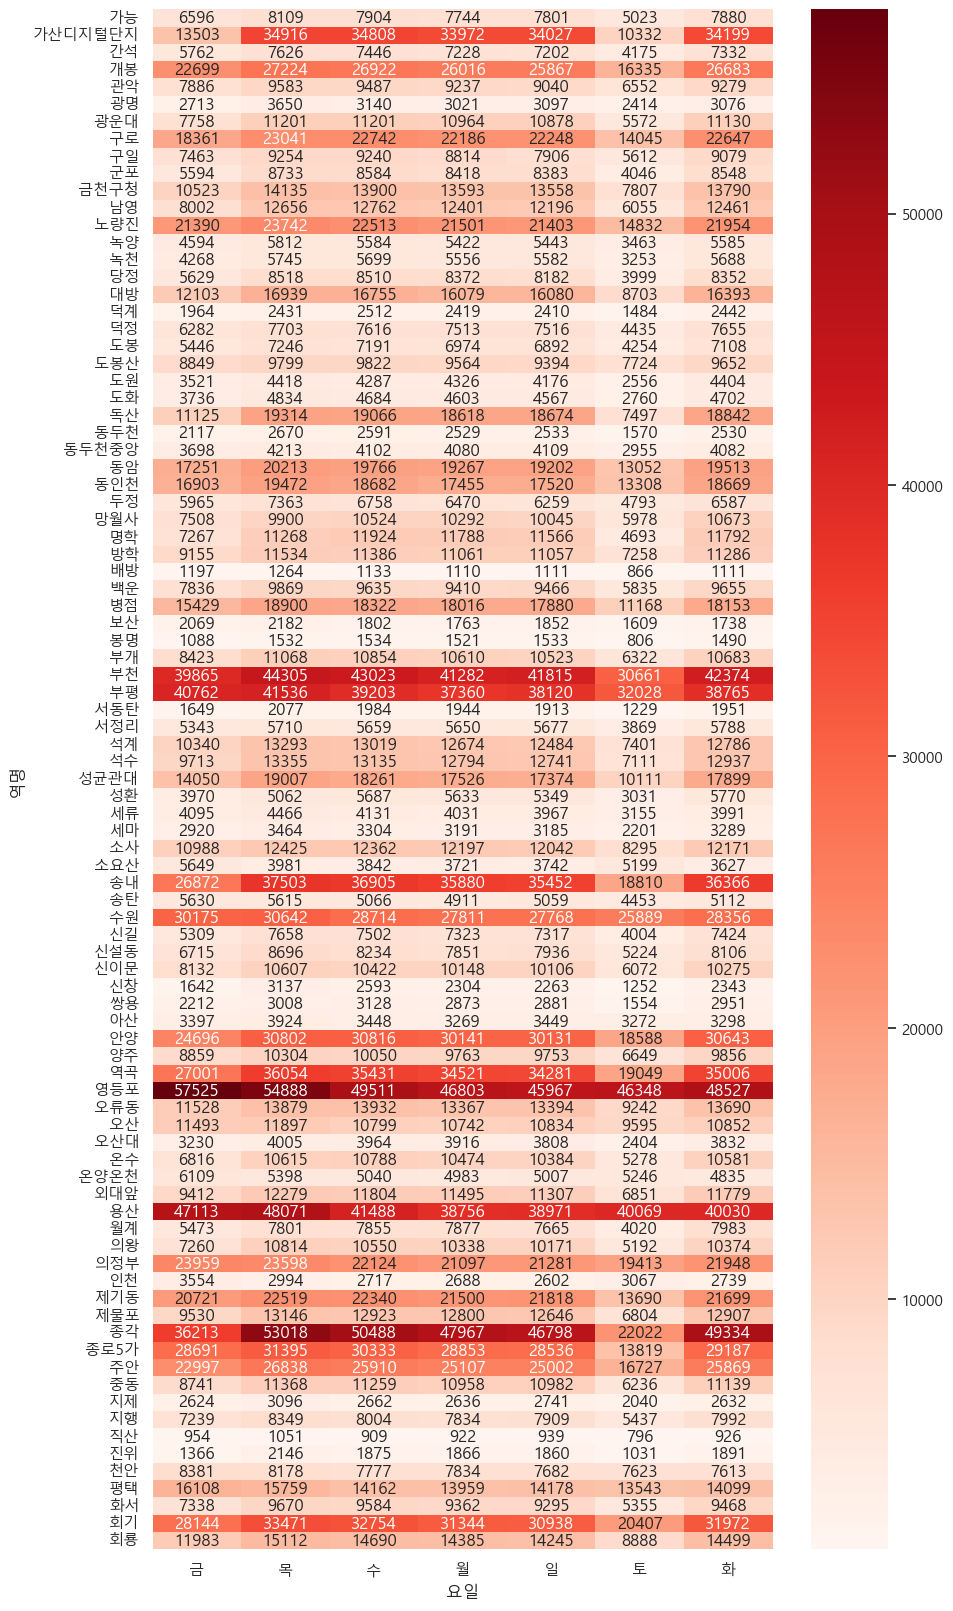

In [84]:
# 1호선
plt.figure(figsize=(10, 20))
sns.heatmap(pivot_01, cmap="Reds", annot=True, fmt='.0f')

<AxesSubplot: xlabel='요일', ylabel='역명'>

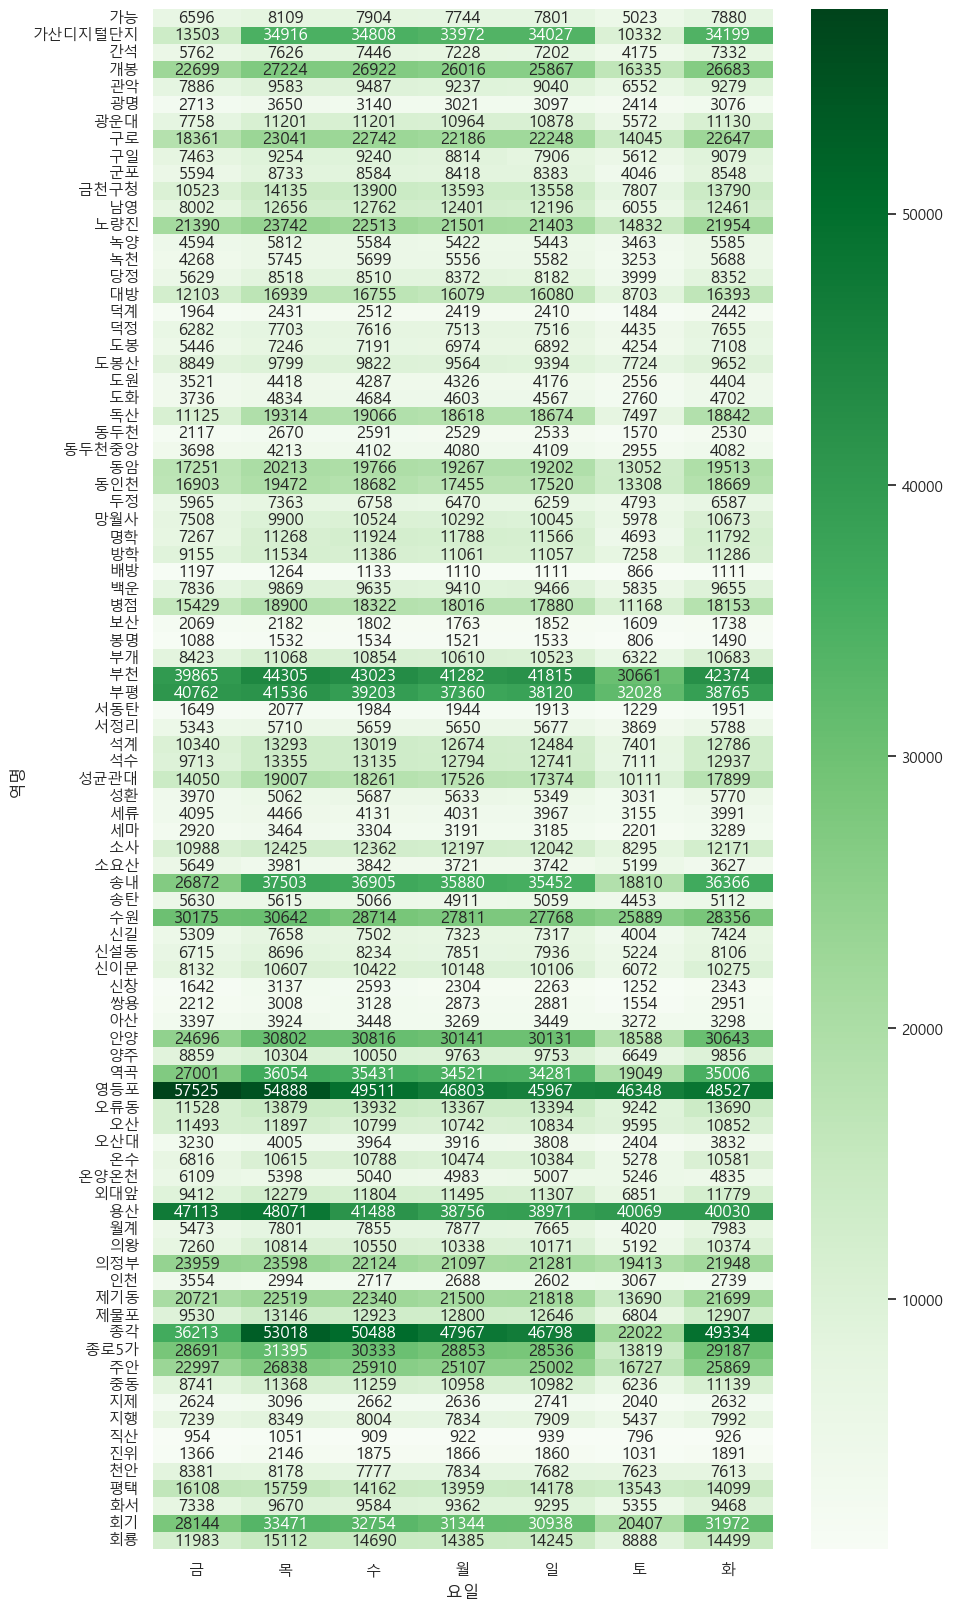

In [85]:
# 2호선
plt.figure(figsize=(10, 20))
sns.heatmap(pivot_01, cmap="Greens", annot=True, fmt='.0f')

<AxesSubplot: xlabel='요일', ylabel='역명'>

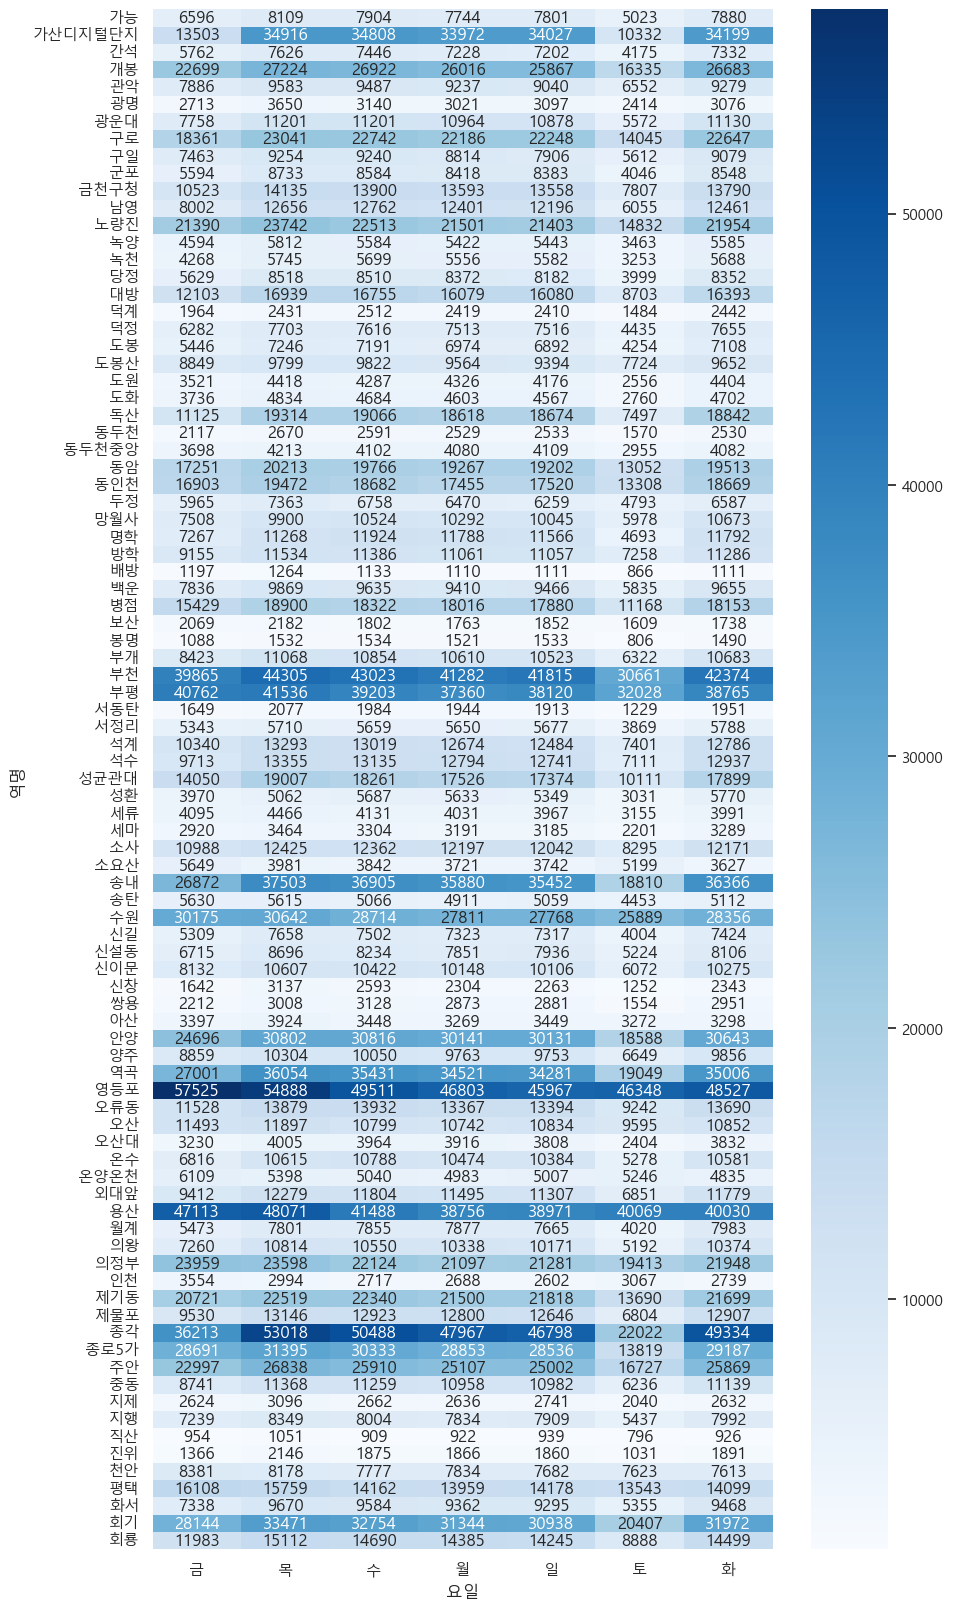

In [86]:
# 2호선
plt.figure(figsize=(10, 20))
sns.heatmap(pivot_01, cmap="Blues", annot=True, fmt='.0f')

# 1호선에서 가장 하차를 많이 하는 곳은?

In [87]:
raw_01 = raw_01.groupby(['노선명','역명'])['하차총승객수'].sum().reset_index()
raw_01.sort_values(by=['하차총승객수'],ascending=False).head(3)

,노선명,역명,하차총승객수
1,1호선,가산디지털단지,10571381.0
52,1호선,수원,10226609.0
62,1호선,영등포,9432067.0


### 가산디지털단지에서 가장 많이 내림

# 2호선에서 가장 많이 승차하는 곳은?

In [89]:
raw_02 = raw_02.groupby(['노선명','역명'])['승차총승객수'].sum().reset_index()

In [92]:
max_raw_02 = raw_02[raw_02['승차총승객수'] == max(raw_02['승차총승객수'])]
max_raw_02

,노선명,역명,승차총승객수
39,2호선,잠실,18574323.0


In [104]:
import folium

# 잠실 위도 경도 : 37.51330927, 127.1002152

latitude = 37.51330927
longitude = 127.1002152

In [105]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=17, 
               width=750, 
               height=500,
               tiles='cartodbpositron'
              )
folium.Marker([latitude, longitude],
              popup="잠실역",
              tooltip="잠실역 입구").add_to(m)
m

# 가설2. 코로나가 발생 다음 달인 2020.02 부터 주말 지하철 이용률이 줄었을 것이다

In [106]:
dirpath2 = './rawfiles2/'
files2 = os.listdir(dirpath2)

In [109]:
raw2 = pd.DataFrame()

for file in files2:
    temp = pd.read_csv(dirpath2 + file)
    raw2 = pd.concat([raw2,temp], axis=0, sort = False)

In [110]:
raw2.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
17734,20200630,장항선,쌍용(나사렛대),1744,1598,20200703
17735,20200630,장항선,봉명,1115,1034,20200703
17736,20200630,일산선,대화,13097,9865,20200703
17737,20200630,일산선,주엽,8370,8470,20200703
17738,20200630,일산선,정발산,6466,6530,20200703


In [111]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   사용일자     107028 non-null  datetime64[ns]
 1   요일       107028 non-null  object        
 2   노선명      107028 non-null  object        
 3   역명       107028 non-null  object        
 4   승차총승객수   107028 non-null  float64       
 5   하차총승객수   107028 non-null  float64       
 6   승하차총승객수  107028 non-null  float64       
 7   연월       107028 non-null  object        
 8   월일       107028 non-null  object        
 9   등록일자     107028 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 8.2+ MB


In [116]:
# raw와 마찬가지로 이거저거 전처리
raw2['사용일자'] = pd.to_datetime(raw2['사용일자'], format='%Y%m%d')
raw2['연월'] = raw2['사용일자'].dt.strftime("%Y-%m")
raw2['월일'] = raw2['사용일자'].dt.strftime('%m-%d')
raw2['요일'] = raw2['사용일자'].dt.dayofweek
raw2['요일'] = raw2['요일'].map(conv)
raw2['승하차총승객수'] = raw2['승차총승객수'] + raw2['하차총승객수']
raw2 = raw2[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일', '등록일자' ]]

In [117]:
raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107483 entries, 0 to 17738
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   사용일자     107483 non-null  datetime64[ns]
 1   요일       107483 non-null  object        
 2   노선명      107483 non-null  object        
 3   역명       107483 non-null  object        
 4   승차총승객수   107483 non-null  int64         
 5   하차총승객수   107483 non-null  int64         
 6   승하차총승객수  107483 non-null  int64         
 7   연월       107483 non-null  object        
 8   월일       107483 non-null  object        
 9   등록일자     107483 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 9.0+ MB


In [119]:
# 주말 이용객 구하기
weekend = (raw['요일'] == '토') | (raw['요일'] == '일')
raw_weekend = raw[weekend]
weekend_2 = (raw2['요일'] == '토') | (raw2['요일'] == '일')
raw2_weekend = raw2[weekend_2]

In [121]:
raw_weekend.sample(5)

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
11901,2019-01-21,일,3호선,약수,15656.0,15309.0,30965.0,2019-01,01-21,20190124
61067,2019-04-14,토,1호선,두정,4775.0,6141.0,10916.0,2019-04,04-14,20190417
52743,2019-03-31,토,4호선,삼각지,2692.0,3348.0,6040.0,2019-03,03-31,20190403
37175,2019-03-04,일,8호선,산성,6585.0,6433.0,13018.0,2019-03,03-04,20190307
28071,2019-02-17,토,경의선,원덕,351.0,319.0,670.0,2019-02,02-17,20190220


In [141]:
raw_weekend_group = raw_weekend.groupby(['연월'])['승하차총승객수'].sum().reset_index()
raw_weekend_group

,연월,승하차총승객수
0,2019-01,98088752.0
1,2019-02,88796591.0
2,2019-03,114897940.0
3,2019-04,123224805.0
4,2019-05,100855505.0
5,2019-06,113215953.0


In [142]:
raw2_weekend_group = raw2_weekend.groupby(['연월'])['승하차총승객수'].sum().reset_index()
raw2_weekend_group

,연월,승하차총승객수
0,2020-01,89359361
1,2020-02,80825705
2,2020-03,74262606
3,2020-04,66829669
4,2020-05,79005425
5,2020-06,88548542


<AxesSubplot: xlabel='연월', ylabel='승하차총승객수'>

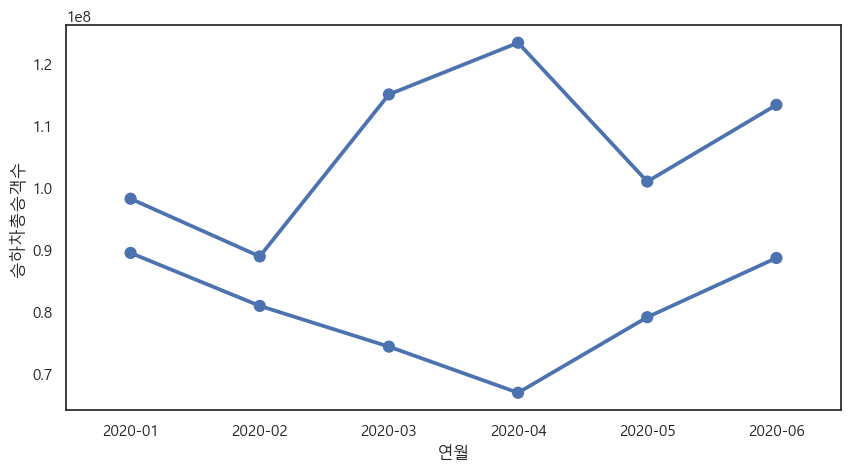

In [143]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(x=raw_weekend_group['연월'], y=raw_weekend_group['승하차총승객수'])
sns.pointplot(x=raw2_weekend_group['연월'], y=raw2_weekend_group['승하차총승객수'])

# 가설 3. 가설 1과 같이 코로나로 인해 지하철 승하차 총승객수가 영향을 받았다면 버스 승하차 총승객수 또한 코로나의 영향을 받았을 것이다.

In [14]:
data = pd.read_csv('BUS_2019/BUS_STATION_BOARDING_MONTH_201901.csv', encoding = 'cp949')
print(data)

             사용일자  노선번호                  노선명 버스정류장ARS번호              역명  \
0        20190101   100       100번(하계동~용산구청)      11428          한성여객종점   
1        20190101   100       100번(하계동~용산구청)      11387         노원평생학습관   
2        20190101   100       100번(하계동~용산구청)      11373             중계역   
3        20190101   100       100번(하계동~용산구청)      11381      중계목화아파트4단지   
4        20190101   100       100번(하계동~용산구청)      11311            인덕대학   
...           ...   ...                  ...        ...             ...   
1185092  20190131  동작01        동작01(달마사~대방역)      20799           건영아파트   
1185093  20190131   542  542번(군포버스공영차고지~신사역)      57040            명학대교   
1185094  20190131  서초02     서초02(교대역~서울고등학교)      22994          아크로비스타   
1185095  20190131   761     761번(진관차고지~영등포역)      13111  연희104고지앞.구성산회관   
1185096  20190131   542  542번(군포버스공영차고지~신사역)      57046            명학초교   

         승차총승객수  하차총승객수      등록일자  
0            10       0  20190104  
1             5       0  20

In [20]:
BusRaw = pd.DataFrame()
dirpath = './BUS_2019/'
files = os.listdir(dirpath)
for file in files:
    temp = pd.read_csv(dirpath + file, encoding = 'cp949')
    BusRaw = pd.concat([BusRaw, temp], axis = 0)
BusRaw.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1194198,20191231,서대문13,서대문13(홍은동국민주택~홍제원현대아파트),13930,인왕산현대아파트101동,3,73,20200103
1194199,20191231,7017,7017번(은평공영차고지~롯데백화점),13117,세브란스병원,177,51,20200103
1194200,20191231,서대문11,서대문11(홍은동국민주택~봉원사입구),13657,문화촌현대아파트,164,175,20200103
1194201,20191231,6516,6516번(양천차고지~박미고개),17001,신도림역,483,78,20200103
1194202,20191231,7017,7017번(은평공영차고지~롯데백화점),13115,연대앞,183,33,20200103


In [21]:
BusRaw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14005276 entries, 0 to 1194202
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   사용일자        int64 
 1   노선번호        object
 2   노선명         object
 3   버스정류장ARS번호  object
 4   역명          object
 5   승차총승객수      int64 
 6   하차총승객수      int64 
 7   등록일자        int64 
dtypes: int64(4), object(4)
memory usage: 961.7+ MB


In [22]:
BusRaw = BusRaw.reset_index(drop = True)

In [24]:
BusRaw.head(7)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20190101,100,100번(하계동~용산구청),11428,한성여객종점,10,0,20190104
1,20190101,100,100번(하계동~용산구청),11387,노원평생학습관,5,0,20190104
2,20190101,100,100번(하계동~용산구청),11373,중계역,27,1,20190104
3,20190101,100,100번(하계동~용산구청),11381,중계목화아파트4단지,110,12,20190104
4,20190101,100,100번(하계동~용산구청),11311,인덕대학,87,76,20190104
5,20190101,100,100번(하계동~용산구청),01198,원남동,34,76,20190104
6,20190101,100,100번(하계동~용산구청),11340,월계헬스케어센터,55,143,20190104


In [25]:
# '사용일자' 타입 int64 --> DateTime 타입으로 변경 : pandas.to_datetime 사용

BusRaw['사용일자'] = pd.to_datetime(BusRaw['사용일자'], format='%Y%m%d')
BusRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14005276 entries, 0 to 14005275
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   사용일자        datetime64[ns]
 1   노선번호        object        
 2   노선명         object        
 3   버스정류장ARS번호  object        
 4   역명          object        
 5   승차총승객수      int64         
 6   하차총승객수      int64         
 7   등록일자        int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 854.8+ MB


In [26]:
BusRaw['사용일자'].dt.strftime('%Y-%m')

0           2019-01
1           2019-01
2           2019-01
3           2019-01
4           2019-01
             ...   
14005271    2019-12
14005272    2019-12
14005273    2019-12
14005274    2019-12
14005275    2019-12
Name: 사용일자, Length: 14005276, dtype: object

In [28]:
BusRaw['연월'] = BusRaw['사용일자'].dt.strftime('%Y-%m')
BusRaw.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,연월
0,2019-01-01,100,100번(하계동~용산구청),11428,한성여객종점,10,0,20190104,2019-01
1,2019-01-01,100,100번(하계동~용산구청),11387,노원평생학습관,5,0,20190104,2019-01
2,2019-01-01,100,100번(하계동~용산구청),11373,중계역,27,1,20190104,2019-01
3,2019-01-01,100,100번(하계동~용산구청),11381,중계목화아파트4단지,110,12,20190104,2019-01
4,2019-01-01,100,100번(하계동~용산구청),11311,인덕대학,87,76,20190104,2019-01


In [29]:
BusRaw['승하차총승객수'] = BusRaw['승차총승객수'] + BusRaw['하차총승객수']

In [30]:
print(BusRaw.columns)

Index(['사용일자', '노선번호', '노선명', '버스정류장ARS번호', '역명', '승차총승객수', '하차총승객수', '등록일자',
       '연월', '승하차총승객수'],
      dtype='object')


In [31]:
BusRaw = BusRaw[['사용일자','노선번호','노선명','역명','승차총승객수','하차총승객수','승하차총승객수','연월','등록일자']]
BusRaw.head()

,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,등록일자
0,2019-01-01,100,100번(하계동~용산구청),한성여객종점,10,0,10,2019-01,20190104
1,2019-01-01,100,100번(하계동~용산구청),노원평생학습관,5,0,5,2019-01,20190104
2,2019-01-01,100,100번(하계동~용산구청),중계역,27,1,28,2019-01,20190104
3,2019-01-01,100,100번(하계동~용산구청),중계목화아파트4단지,110,12,122,2019-01,20190104
4,2019-01-01,100,100번(하계동~용산구청),인덕대학,87,76,163,2019-01,20190104


In [33]:
fpath = './Bus_raw_2019.csv'
BusRaw.to_csv(fpath, index = False, encoding = 'utf-8-sig')